### 🧹 Data Cleaning Utility

In [21]:
import pandas as pd
import numpy as np

In [22]:

df = pd.read_csv(r"E:\syntecxhub_project1\Data_cleaning_utility\Sample - Superstore.csv", encoding="latin1")
print("✅ Dataset Loaded Successfully\n")

✅ Dataset Loaded Successfully



### Store original stats


In [23]:
original_rows = df.shape[0]
missing_before = df.isnull().sum().sum()

print("📊 BEFORE CLEANING")
print("Rows:", original_rows)
print("Missing Values:", missing_before)


📊 BEFORE CLEANING
Rows: 9994
Missing Values: 0


### Create cleaning log


In [24]:
cleaning_log = []


###  Standardize Column Names


In [25]:

original_columns = df.columns.tolist()
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

cleaning_log.append("Standardized column names (lowercase + underscores)")


###  Detect & Handle Missing Values


In [26]:

missing_before = df.isnull().sum().sum()

# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17432\922629839.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [36]:
# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

missing_after = df.isnull().sum().sum()

cleaning_log.append(f"Handled missing values (Before: {missing_before}, After: {missing_after})")

C:\Users\Admin\AppData\Local\Temp\ipykernel_17432\3561157789.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### Fix Data Types & Parse Dates


In [28]:

# Convert order_date and ship_date to datetime (if exists)
date_columns = ["order_date", "ship_date"]

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
        cleaning_log.append(f"Converted {col} to datetime")

# Ensure numeric columns are numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

cleaning_log.append("Validated numeric data types")

### Remove Duplicates


In [29]:

rows_before = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after = df.shape[0]

cleaning_log.append(f"Removed duplicates (Before: {rows_before}, After: {rows_after})")


In [30]:
missing_after = df.isnull().sum().sum()

print("\n📊 AFTER CLEANING")
print("Rows:", df.shape[0])
print("Missing Values:", missing_after)



📊 AFTER CLEANING
Rows: 9994
Missing Values: 6116


### Detect Outliers using IQR (Sales column)


In [31]:

Q1 = df["sales"].quantile(0.25)
Q3 = df["sales"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["sales"] < Q1 - 1.5*IQR) | 
              (df["sales"] > Q3 + 1.5*IQR)]

print("🔎 Outliers Detected:", len(outliers))


🔎 Outliers Detected: 1167


###  Save Cleaned Dataset


In [32]:

df.to_csv("cleaned_dataset.csv", index=False)

cleaning_log.append("Saved cleaned dataset as cleaned_dataset.csv")

### Save Cleaning Log


In [33]:

with open("cleaning_log.txt", "w") as f:
    for item in cleaning_log:
        f.write(item + "\n")

print("✅ Data Cleaning Completed Successfully!")
print("\n📝 Cleaning Log:")
for log in cleaning_log:
    print("-", log)

✅ Data Cleaning Completed Successfully!

📝 Cleaning Log:
- Standardized column names (lowercase + underscores)
- Converted order_date to datetime
- Converted ship_date to datetime
- Validated numeric data types
- Removed duplicates (Before: 9994, After: 9994)
- Saved cleaned dataset as cleaned_dataset.csv


### Business rule validation


In [34]:
invalid_sales = df[df["sales"] < 0]

if len(invalid_sales) > 0:
    print("⚠ Warning: Negative sales detected")
else:
    print("✅ No negative sales values")


✅ No negative sales values


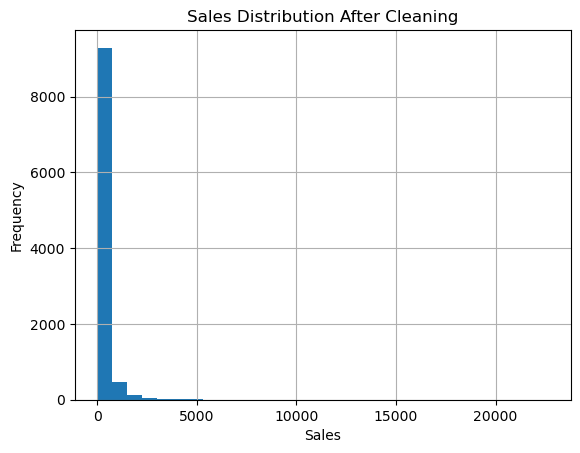

In [35]:
import matplotlib.pyplot as plt

df["sales"].hist(bins=30)
plt.title("Sales Distribution After Cleaning")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()
